<a href="https://colab.research.google.com/github/cristhiansito123/MLDS6project/blob/entrega2/scripts/preprocessing/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


import neccesary packages

In [ ]:
import json
import requests
import os
import shutil
import time
import sys

import numpy as np
import pandas as pd

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
%matplotlib inline

#Descarga de datos

In [ ]:

metadata_path = '/content/drive/MyDrive/MLDS6project/data.csv'

metadata = pd.read_csv(metadata_path, sep=',')


In [ ]:
metadata

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


## Extracción de características

PCA componentes

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
df = metadata.drop('type', axis=1)

In [ ]:
df = df.drop('nameOrig', axis=1)
df = df.drop('nameDest', axis=1)

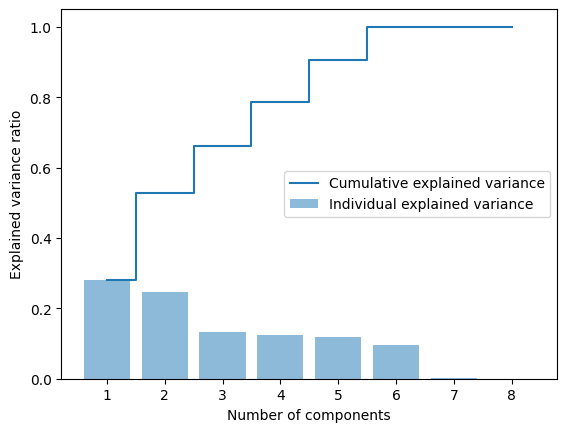

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

pca = PCA()
pca.fit(scaled_data)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.show()